In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
folder_root = "Final work/Validation against clinically approved drugs" 
file_paths = { "6bae_BA.csv": "6bae", "6b9y_BA.csv": "6b9y" }   # file_name, pdb_code

for file_name, pdb_code in file_paths.items(): 
    file_path = os.path.join("Clean files", file_name) 
    df = pd.read_csv(file_path) 

    """
    Create directories for different types of data related to each PDB files:
    - 'chains': For storing data related to different chains
    - 'all_amino_acids': For storing data related to all amino acids
    - 'amino_acid_type(wt_aa)': For storing data related to wild-type amino acids
    - 'amino_acid_type(mut_aa)': For storing data related to mutant-type amino acids
    - 'pictures_and_pdb_files': For storing pictures and PDB files
    """
    
    os.makedirs(f"{folder_root}/{pdb_code}/{pdb_code}_correlations-DF/chains", exist_ok=True) 
    os.makedirs(f"{folder_root}/{pdb_code}/{pdb_code}_correlations-DF/all_amino_acids", exist_ok=True) 
    os.makedirs(f"{folder_root}/{pdb_code}/{pdb_code}_correlations-DF/amino_acid_type(wt_aa)", exist_ok=True) 
    os.makedirs(f"{folder_root}/{pdb_code}/{pdb_code}_correlations-DF/amino_acid_type(mut_aa)", exist_ok=True) 
    os.makedirs(f"{folder_root}/{pdb_code}/{pdb_code}_pictures_and_pdb_files", exist_ok=True)

## Rosetta plots

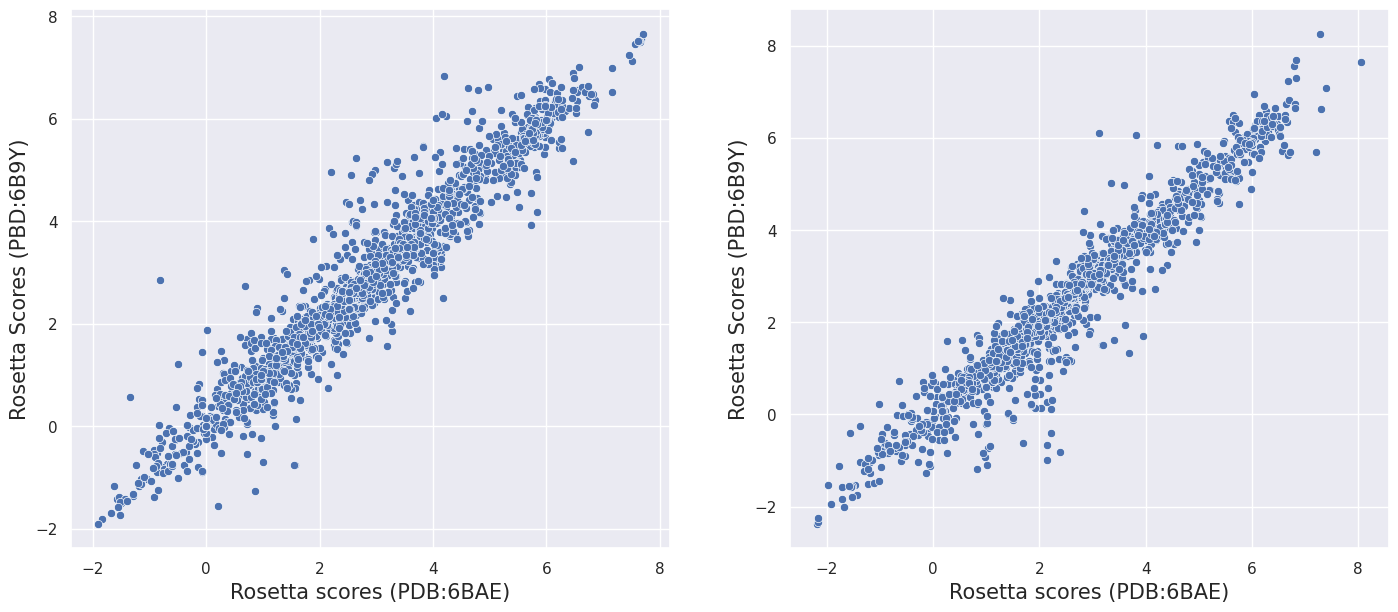

In [8]:
"""
This is Trastuzumab both of the same resolution and 100% sequence identiy?
The Rosetta scores should have been very similar)
"""
df1 = pd.read_csv("Clean files/6bae_BA.csv")
df2 = pd.read_csv("Clean files/6b9y_BA.csv")
df3 = pd.merge(df1, df2, on=["chain", "position", "WT_AA", "MUT_AA"], how="left") # Merge dataframes

def plot_scatterplot_by_chain(df):

    """
    Define a function to plot scatterplots for each chain based on the provided DataFrame.
    """
    
    L_chain = df[df["chain"] == "L"]  # split by chain
    H_chain = df[df["chain"] == "H"]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
    
    sns.set_theme()
    # Plot scatterplot for H chain
    sns.scatterplot(data= H_chain, x="Rosetta normalised_x", y="Rosetta normalised_y", ax=axes[0])  # Use column names directly
    axes[0].set_xlabel(f"Rosetta scores (PDB:6BAE)", size=15)
    axes[0].set_ylabel(f"Rosetta Scores (PBD:6B9Y)", size=15)
    # axes[0].set_title(f"H chain")

    # Plot scatterplot for L chain
    sns.scatterplot(data= L_chain, x="Rosetta normalised_x", y="Rosetta normalised_y", ax=axes[1])  # Use column names directly
    axes[1].set_xlabel(f"Rosetta scores (PDB:6BAE)", size=15)
    axes[1].set_ylabel(f"Rosetta Scores (PBD:6B9Y)", size=15)
    # axes[1].set_title(f"Light chain", size=20)

    plt.savefig("Final work/Validation against clinically approved drugs/Resolutions/Resolution pictures/6bae_BA_6b9y_BA_rosetta_score_distribution_scatterplot.png", bbox_inches = "tight")

plot_scatterplot_by_chain(df3)

In [4]:
df3.to_csv("6b9y_6bae.csv", index=False)

## Antiberty plots (same structures as above)

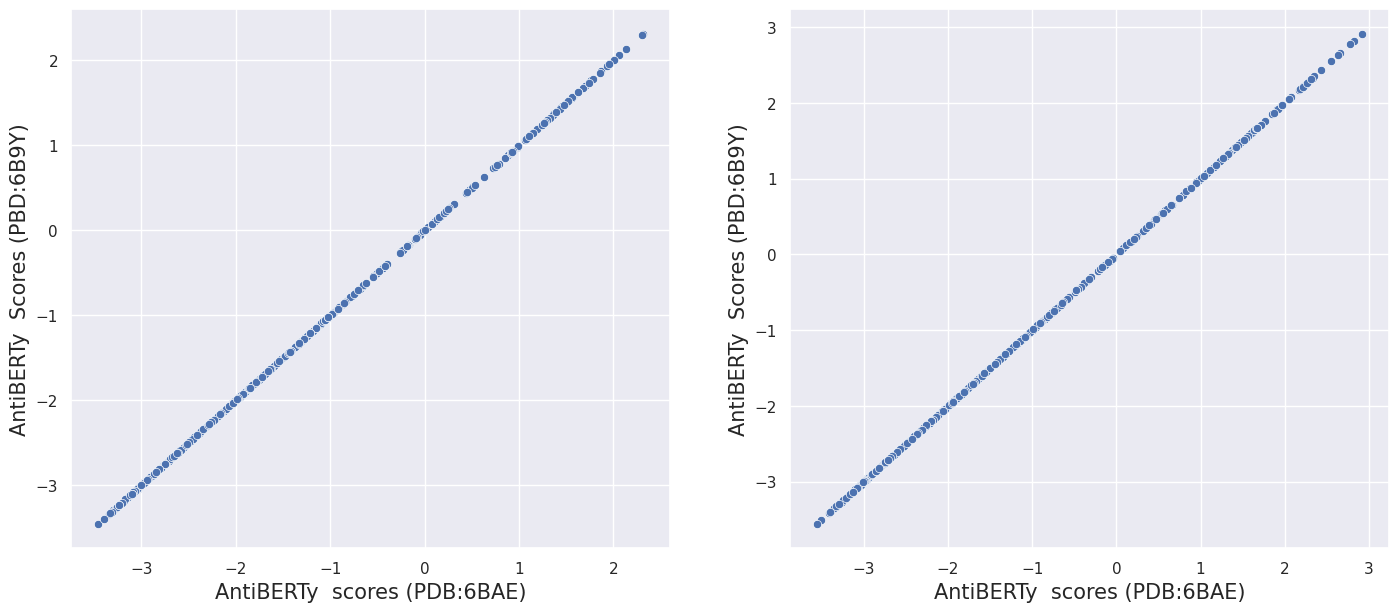

In [5]:
df1 = pd.read_csv("Clean files/6bae_BA.csv")
df2 = pd.read_csv("Clean files/6b9y_BA.csv")
df3 = pd.merge(df1, df2, on=["chain", "position", "WT_AA", "MUT_AA"], how="left") # Merge dataframes

def plot_scatterplot_by_chain(df):

    """
    Define a function to plot scatterplots for each chain based on the provided DataFrame.
    """
    
    L_chain = df[df["chain"] == "L"]  # split by chain
    H_chain = df[df["chain"] == "H"]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
    
    sns.set_theme()
    # Plot scatterplot for H chain
    sns.scatterplot(data= H_chain, x="AntiBERTy normalised_x", y="AntiBERTy normalised_y", ax=axes[0]) 
    axes[0].set_xlabel(f"AntiBERTy  scores (PDB:6BAE)", size=15)
    axes[0].set_ylabel(f"AntiBERTy  Scores (PBD:6B9Y)", size=15)
    # axes[0].set_title(f"H chain")

    # Plot scatterplot for L chain
    sns.scatterplot(data= L_chain, x="AntiBERTy normalised_x", y="AntiBERTy normalised_y", ax=axes[1])
    axes[1].set_xlabel(f"AntiBERTy  scores (PDB:6BAE)", size=15)
    axes[1].set_ylabel(f"AntiBERTy  Scores (PBD:6B9Y)", size=15)
    # axes[1].set_title(f"L chain")
    plt.savefig("Final work/Validation against clinically approved drugs/Resolutions/Resolution pictures/6bae_BA_6b9y_BA_comparision_antiberty.png", bbox_inches ="tight")

plot_scatterplot_by_chain(df3)

## Antibody strucutres where only the light chain differs

5jw5_AB has the position (27-29) missing whilst 5jw5_HL has the entire sequence 

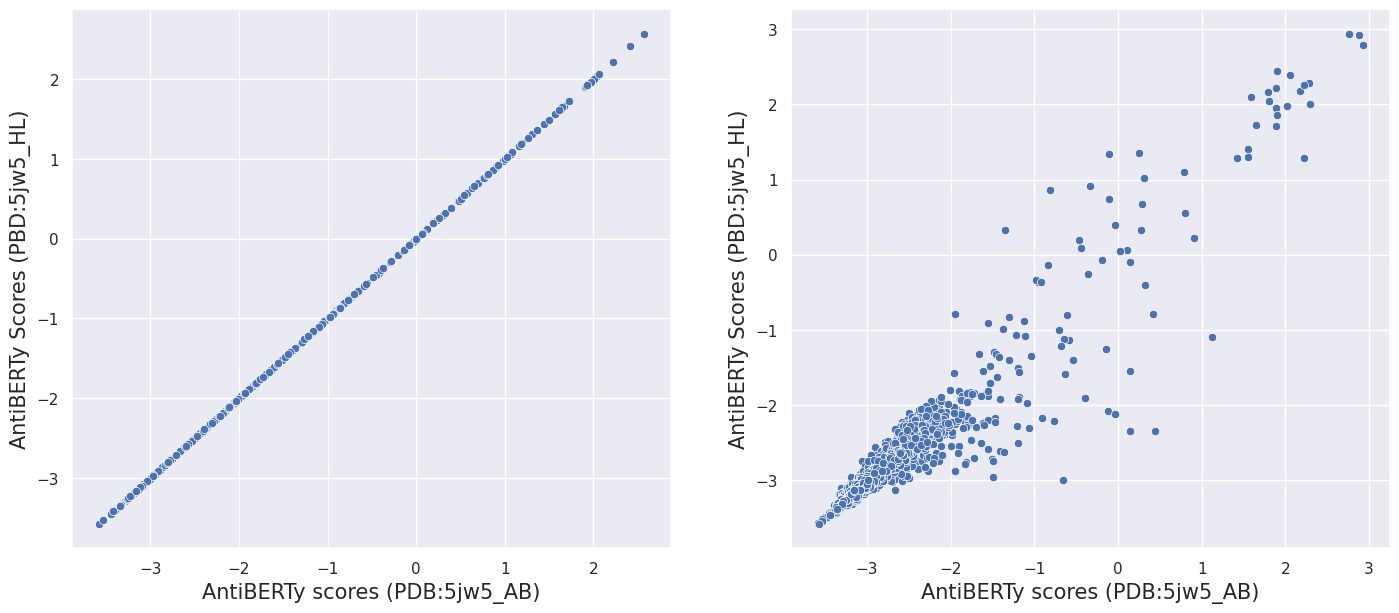

In [6]:
df1 = pd.read_csv("Clean files/5jw5_AB.csv")
df2 = pd.read_csv("Clean files/5jw5_HL.csv")
df3 = pd.merge(df1, df2, on=["chain", "position", "WT_AA", "MUT_AA"], how="left") # Merge dataframes
file_path = os.path.join("Final work/Validation against clinically approved drugs/Resolutions/Data", "5jw5_AB_5jw5_HL_comparison_antiberty.csv")
df3.to_csv(file_path, index=False)

def plot_scatterplot_by_chain(df):

    """
    Define a function to plot scatterplots for each chain based on the provided DataFrame.
    """
    
    L_chain = df[df["chain"] == "L"]  # split by chain
    H_chain = df[df["chain"] == "H"]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
    
    sns.set_theme()
    # Plot scatterplot for H chain
    sns.scatterplot(data= H_chain, x="AntiBERTy normalised_x", y="AntiBERTy normalised_y", ax=axes[0])
    axes[0].set_xlabel(f"AntiBERTy scores (PDB:5jw5_AB)", size=15)
    axes[0].set_ylabel(f"AntiBERTy Scores (PBD:5jw5_HL)", size=15)
    # axes[0].set_title(f"H chain")

    # Plot scatterplot for L chain
    sns.scatterplot(data= L_chain, x="AntiBERTy normalised_x", y="AntiBERTy normalised_y", ax=axes[1])
    axes[1].set_xlabel(f"AntiBERTy scores (PDB:5jw5_AB)", size=15)
    axes[1].set_ylabel(f"AntiBERTy Scores (PBD:5jw5_HL)", size=15)
    # axes[1].set_title(f"L chain")
    plt.savefig("Final work/Validation against clinically approved drugs/Resolutions/Resolution pictures/5jw5_AB_5jw5_HL_comparision_antiberty.png", bbox_inches ="tight")

plot_scatterplot_by_chain(df3)

## Antibody structures where both chains differ

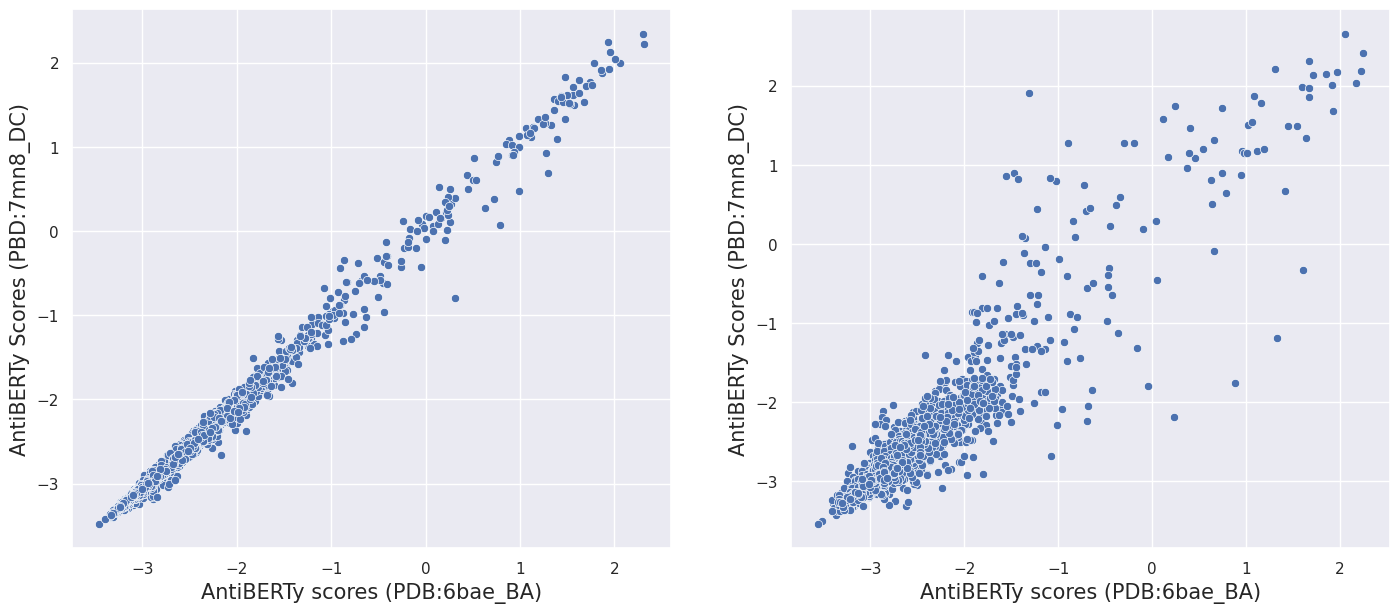

In [7]:
df1 = pd.read_csv("Clean files/6bae_BA.csv")
df2 = pd.read_csv("Clean files/7mn8_DC.csv")
df3 = pd.merge(df1, df2, on=["chain", "position", "WT_AA", "MUT_AA"], how="left") # Merge dataframes
file_path = os.path.join("Final work/Validation against clinically approved drugs/Resolutions/Data", "6bae_BA_7mn8_DC_comparision_antiberty.csv")
df3.to_csv(file_path, index=False)


def plot_scatterplot_by_chain(df, threshold=0.5):

    """
    Define a function to plot scatterplots for each chain based on the provided DataFrame.
    """
    
    L_chain = df[df["chain"] == "L"]  # split by chain
    H_chain = df[df["chain"] == "H"]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(17, 7))
    
    sns.set_theme()
    # Plot scatterplot for H chain
    sns.scatterplot(data= H_chain, x="AntiBERTy normalised_x", y="AntiBERTy normalised_y", ax=axes[0]) 
    axes[0].set_xlabel(f"AntiBERTy scores (PDB:6bae_BA)", size=15)
    axes[0].set_ylabel(f"AntiBERTy Scores (PBD:7mn8_DC)", size=15)
    # axes[0].set_title(f"H chain")

    # Plot scatterplot for L chain
    sns.scatterplot(data= L_chain, x="AntiBERTy normalised_x", y="AntiBERTy normalised_y", ax=axes[1])
    axes[1].set_xlabel(f"AntiBERTy scores (PDB:6bae_BA)", size=15)
    axes[1].set_ylabel(f"AntiBERTy Scores (PBD:7mn8_DC)", size=15)
    # axes[1].set_title(f"L chain")
    
    plt.savefig("Final work/Validation against clinically approved drugs/Resolutions/Resolution pictures/6bae_BA_7mn8_DC_comparision_antiberty.png", bbox_inches ="tight")

plot_scatterplot_by_chain(df3)